# Titatnic Analysis

## Objective : To create a model to predict the survival of the passengers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Feature Details

* Survival - (0 = No, 1 = Yes)
* pclass - Ticket class;1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp - no. of siblings / spouses aboard the Titanic
* parch - no. of parents / children aboard the Titanic
* ticket - Ticket number
* fare -Passenger fare	
* cabin - Cabin number
* embarked- Port of Embarkation;( C = Cherbourg, Q = Queenstown, S = Southampton)
###############################################################################################################################
* pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

* sibsp: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

* parch: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

In [2]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Basic Observation 
* From the columns we can infer that survival of the passengers depends on various factors to certain extent.
* In the following analysis we are going to confirm our hypothesis>
* We will also check the other features so as to improve the accuracy of the model.
* IMP.
* Pclass - holds importance as we all know it is a money oriented world.
* Sex - there is a chance priority could be given to gender.
* Age - same as above.
* Fare - fare could be an important feature.



### Cleaning the data

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic['Sex'] =le.fit_transform(titanic['Sex'])

In [4]:
titanic.drop(columns =['Cabin'],inplace = True)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 73.2+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


* Survived - 
* Age : MAX  - 80, MIN - 0.42, MEAN - 29.7
* SibSp : MAX - 8,MIN - 0
* Fare : MAX - 512, MIN - 0, 32.2

* So we know that maximum age is 80 and minimum age is 0.4
* The highest fare is 512 and the lowest fare is 0

# EDA

In [7]:
survived = titanic[titanic['Survived'] == 1]
not_survived = titanic[titanic['Survived'] == 0]

## Univariate Analysis

### Survival according to the Passenger Class

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


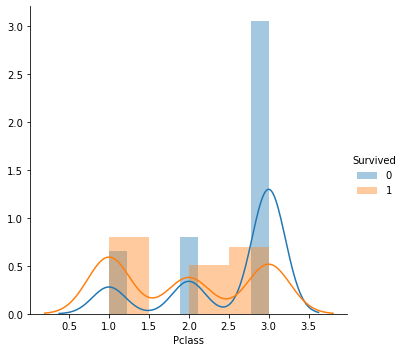

In [8]:
sns.FacetGrid(titanic,hue = 'Survived',size = 5) \
   .map(sns.distplot,'Pclass') \
   .add_legend()
plt.show()

* We can see that most people who survives are from the first class.

### Survival according to the Fare

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


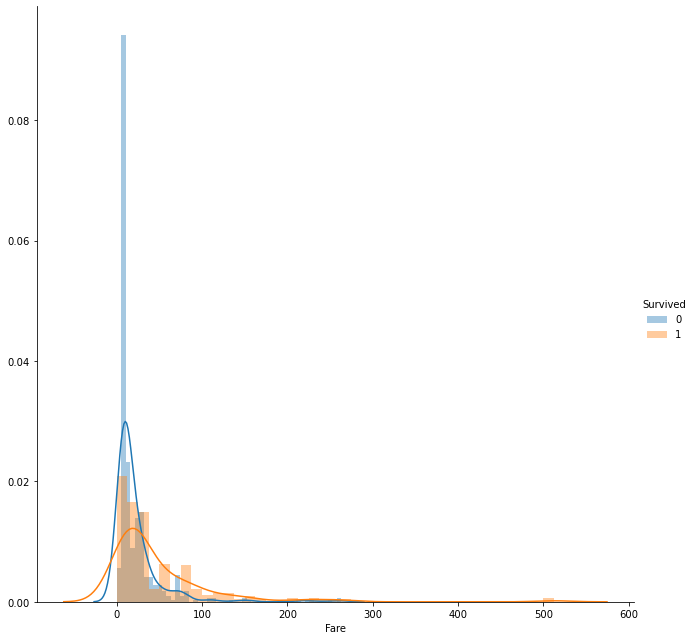

In [9]:
sns.FacetGrid(titanic,hue = 'Survived',size = 9) \
   .map(sns.distplot,'Fare') \
   .add_legend()
plt.show()

* We can see that most people who died were from the low fare class.

### Survival according to gender

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


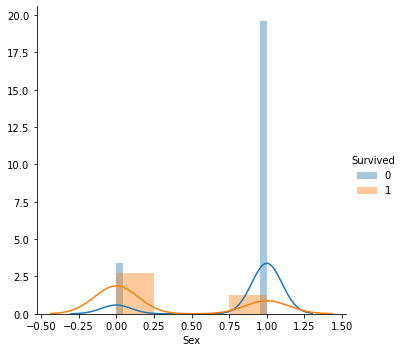

In [10]:
sns.FacetGrid(titanic,hue = 'Survived',size= 5) \
   .map(sns.distplot,'Sex',) \
   .add_legend()
plt.show()

* We can infer that survival of females were more likely even with the gender ratio.

### Survival according to gender

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


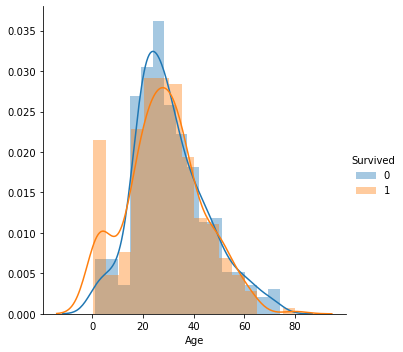

In [11]:
sns.FacetGrid(titanic,hue = 'Survived',size= 5) \
   .map(sns.distplot,'Age',) \
   .add_legend()
plt.show()

* It is difficult to come to a conclusion since there is too much overlap.
* But we can see that the children under the age 10 are mostly saved.

## Correlation 

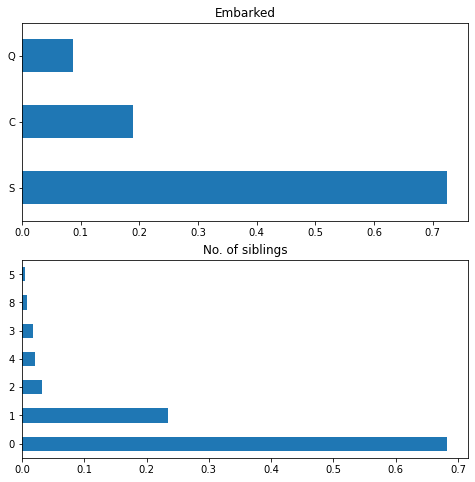

In [12]:
titanic_2 = titanic.copy(deep = True)
figure,ax = plt.subplots(2,1,figsize = (8,8))
titanic_2.Embarked.value_counts(normalize = True).plot(kind = 'barh',ax = ax[0],title = 'Embarked')
titanic_2.SibSp.value_counts(normalize = True).plot(kind = 'barh',ax = ax[1],title = 'No. of siblings')

plt.show()

In [31]:
Embarked = titanic_2[['Embarked']]
embarked = pd.get_dummies(Embarked)
titanic_data = pd.concat([titanic_2,embarked],axis = 1)
titanic_data= titanic_data.drop(columns =['Embarked'])

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    1  22.0      1      0   7.2500           0           0   
1         1       1    0  38.0      1      0  71.2833           1           0   
2         1       3    0  26.0      0      0   7.9250           0           0   
3         1       1    0  35.0      1      0  53.1000           0           0   
4         0       3    1  35.0      0      0   8.0500           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  


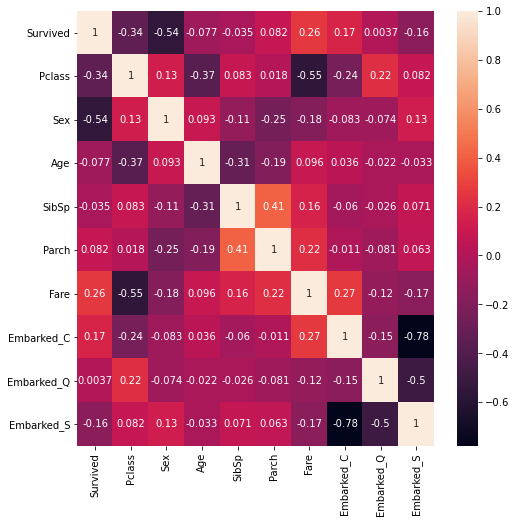

In [32]:
plt.figure(figsize = (8,8))
corr = titanic_data.corr()
sns.heatmap(corr,annot = True)
print(titanic_data.head())

* Correlation of Fare and Survival is  0.26
* Correlation of Age and Survival is  -0.077
* Correlation of Sex and Survival is  -0.54
* Correlation of Passenger Class and Survival is -0.34

## Bi - Variate Analysis
### Pair Plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


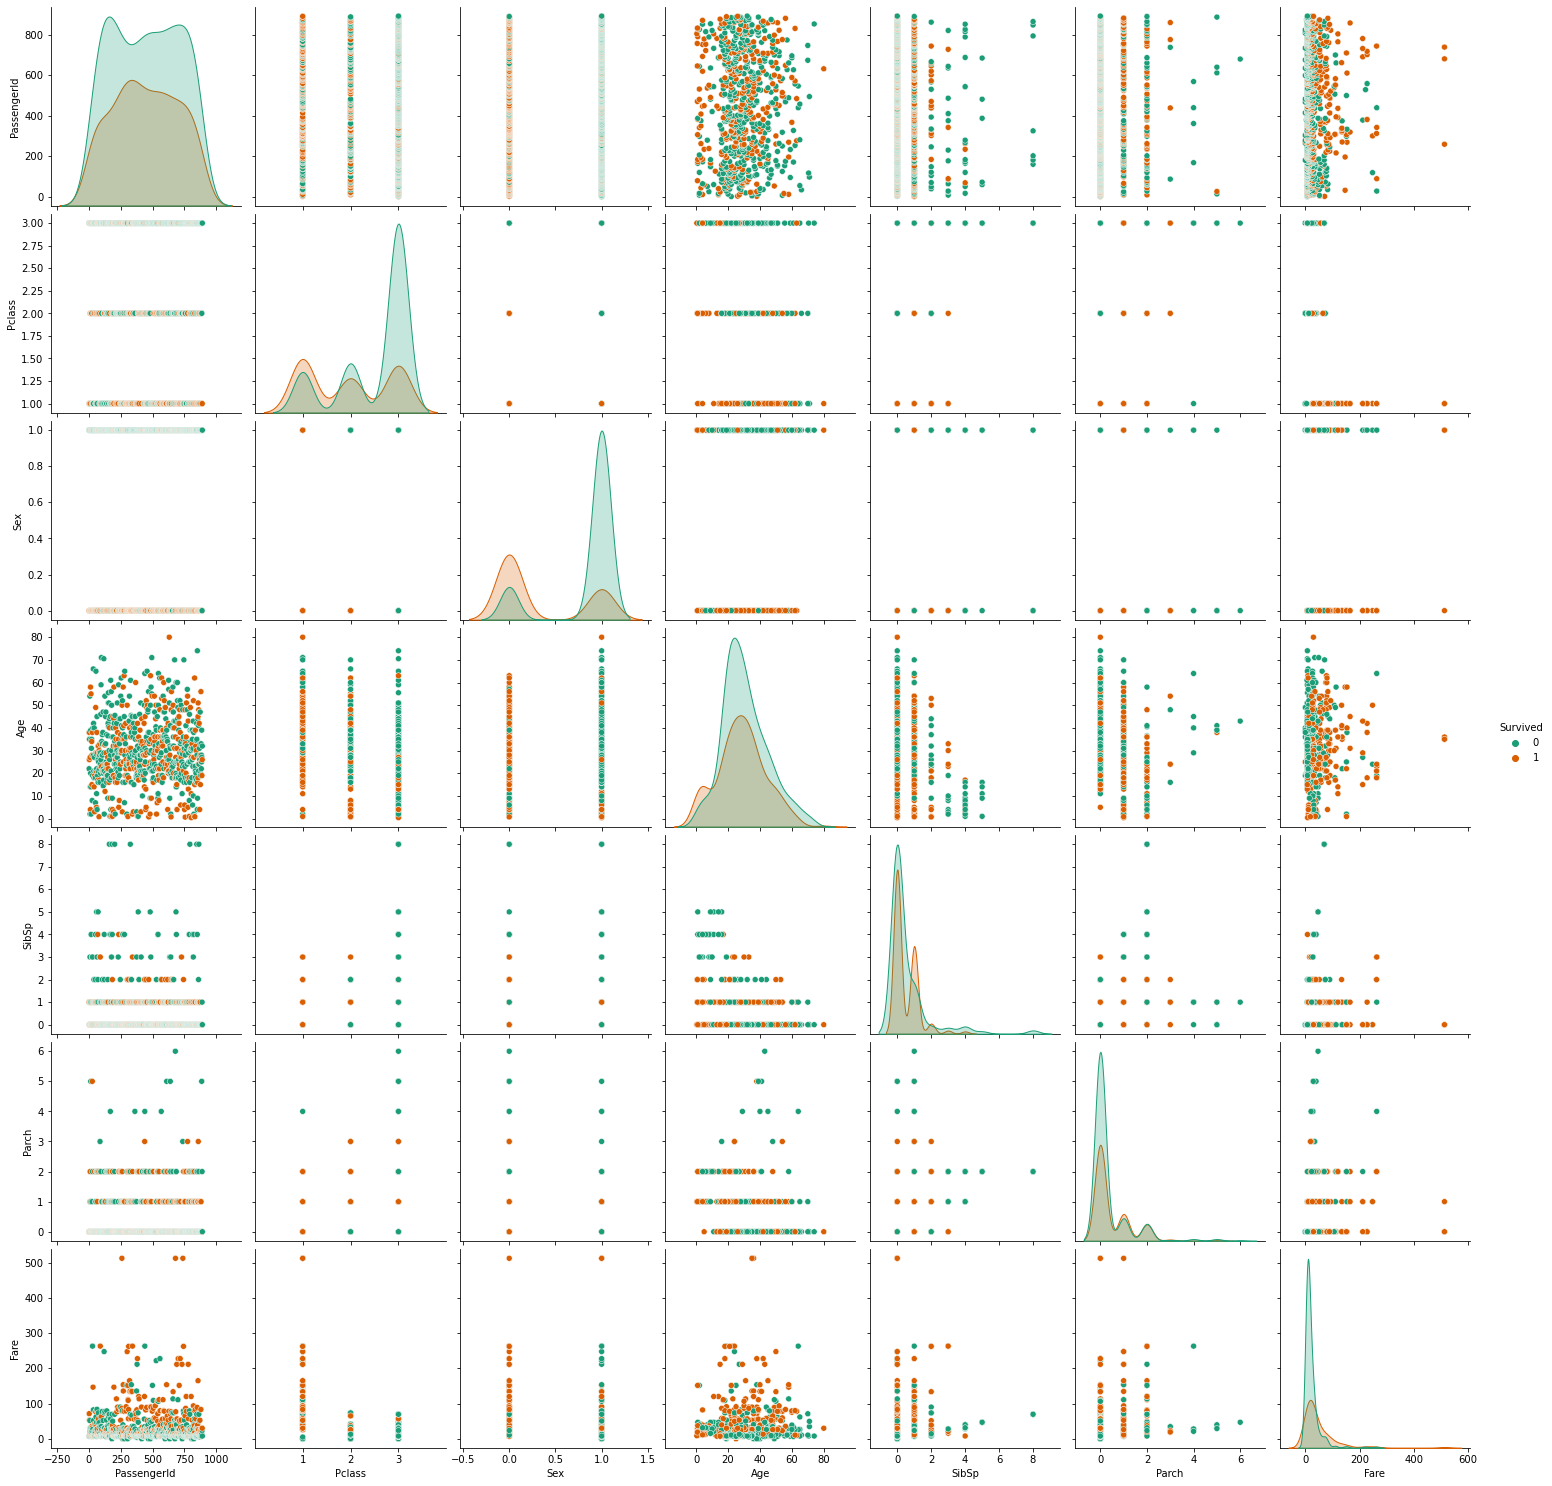

In [15]:
sns.pairplot(titanic_2,hue = 'Survived',palette = 'Dark2',size =3)

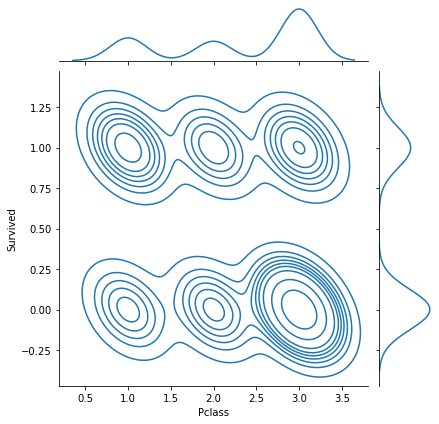

In [16]:
sns.jointplot(x = 'Pclass',y = 'Survived',data = titanic_2,kind = 'kde')

### Multi Variate Probability Density

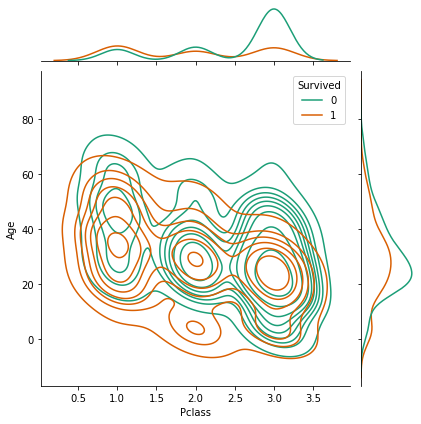

In [17]:
sns.jointplot(x = 'Pclass',y = 'Age',hue = 'Survived',data = titanic_2,kind = 'kde',palette = 'Dark2')

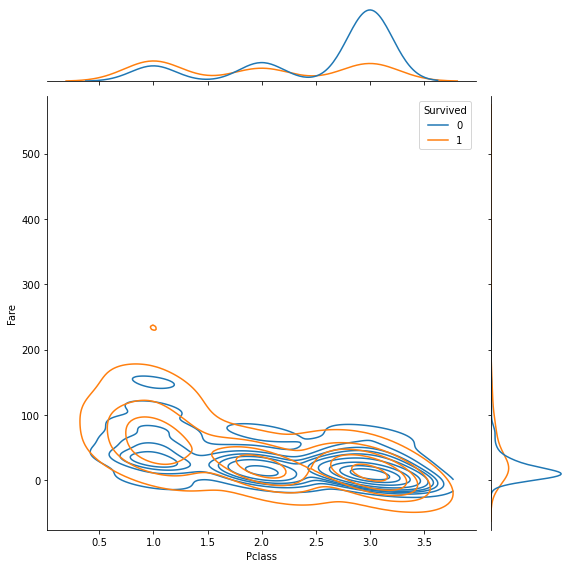

In [18]:
sns.jointplot(x = 'Pclass',y = 'Fare',height = 8,hue = 'Survived',data = titanic_2,kind = 'kde')

## Feature Engineering

* We also need to do something with the missing values
* It looks like we could do some modifications in the 'Age','Parch' columns.

In [33]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [34]:
# titanic_data = titanic_2.drop(columns = ['PassengerId','Name','Ticket'],inplace = True)

In [37]:
titanic_data[titanic_data['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
5,0,3,1,NaN,0,0,8.4583,0,1,0
17,1,2,1,NaN,0,0,13.0000,0,0,1
19,1,3,0,NaN,0,0,7.2250,1,0,0
26,0,3,1,NaN,0,0,7.2250,1,0,0
28,1,3,0,NaN,0,0,7.8792,0,1,0
...,...,...,...,...,...,...,...,...,...,...
859,0,3,1,NaN,0,0,7.2292,1,0,0
863,0,3,0,NaN,8,2,69.5500,0,0,1
868,0,3,1,NaN,0,0,9.5000,0,0,1
878,0,3,1,NaN,0,0,7.8958,0,0,1


In [38]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'mean')

In [39]:
imputer_values = pd.DataFrame(si.fit_transform(titanic_data))
imputer_values.columns = titanic_data.columns
imputer_values.head()
titanic_data = imputer_values

In [40]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      891 non-null    float64
 2   Sex         891 non-null    float64
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    float64
 5   Parch       891 non-null    float64
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    float64
 8   Embarked_Q  891 non-null    float64
 9   Embarked_S  891 non-null    float64
dtypes: float64(10)
memory usage: 69.7 KB


# Feature Selection

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import eli5
from eli5.sklearn import PermutationImportance

In [161]:
titanic_data.columns
feature_names = [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = titanic_data[feature_names]
y = titanic_data.Survived
train_X,val_X,train_y,val_y = train_test_split(X,y,test_size = 0.35)

In [162]:
first_model = RandomForestClassifier(n_estimators = 100,random_state = 1)
first_model.fit(train_X,train_y)

RandomForestClassifier(random_state=1)

In [141]:
print('Accuracy :',first_model.score(val_X,val_y))

Accuracy : 0.9839743589743589


In [44]:
perm = PermutationImportance(first_model,random_state = 1).fit(train_X,train_y)
eli5.show_weights(perm,feature_names = feature_names)

Weight,Feature
0.2494 ± 0.0206,Sex
0.1537 ± 0.0145,Fare
0.1416 ± 0.0179,Age
0.1264 ± 0.0213,Pclass
0.0442 ± 0.0129,Parch
0.0356 ± 0.0068,SibSp
0.0162 ± 0.0052,Embarked_S
0.0155 ± 0.0062,Embarked_C
0.0055 ± 0.0034,Embarked_Q


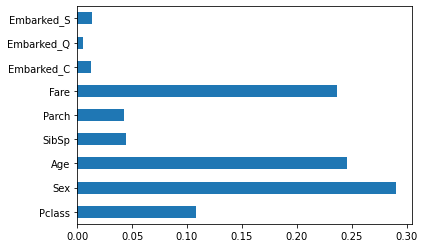

In [86]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X,y)
feature_imp = pd.Series(etc.feature_importances_,index = X.columns)
feature_imp.plot(kind = 'barh')
plt.show()

#  Test Data

In [52]:
test_data = pd.read_csv('test.csv')

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_data['Sex'] =le.fit_transform(test_data['Sex'])

# test_data.drop(columns =['Cabin'],inplace = True)
# test_data = test_data.drop(columns = ['PassengerId','Name','Ticket'],inplace = True)

print(test_data.head())

   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [70]:
# Embarked = test_data[['Embarked']]
# embarked = pd.get_dummies(Embarked)
# test_data= test_data.drop(columns =['Embarked'])
# test_data = pd.concat([test_data,embarked],axis = 1)
# test_data = test_data.drop(columns = ['Ticket'])
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int32  
 2   Age         332 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        417 non-null    float64
 6   Embarked_C  418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int32(1), int64(3), uint8(3)
memory usage: 19.3 KB


In [71]:
feature_names = [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S']
test_data = test_data[feature_names]


In [73]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'mean')

imputer_values = pd.DataFrame(si.fit_transform(test_data))
imputer_values.columns = test_data.columns
imputer_values.head()
test_data = imputer_values
test_data.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

# Model Training

### Random Forest Classifier

In [128]:
first_model.fit(val_X,val_y)

RandomForestClassifier(random_state=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Density'>

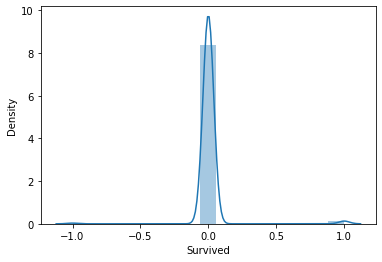

In [129]:
preds = (first_model.predict(val_X))
sns.distplot(val_y-preds)

In [123]:
from sklearn import metrics
print('Mean Absolute Error',metrics.mean_absolute_error(val_y,preds))

Mean Absolute Error 0.15705128205128205


# Hyperparameter Tuning

In [94]:
from sklearn.model_selection import RandomizedSearchCV
# rf_random = RandomizedSearchCV()
n_estimators = [int(each) for each in np.linspace(start = 100,stop = 1200,num = 12)]
max_features = ['sqrt','auto']
max_depth = [int(each) for each in np.linspace(5,30,num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [96]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [97]:
rf_random = RandomizedSearchCV(first_model,param_distributions = random_grid,
                               scoring = 'neg_mean_squared_error',n_iter = 10,cv = 5,verbose = 2,random_state = 1,n_jobs = 1)

In [ ]:
rf_random_2= RandomizedSearchCV(first_model,param_distributions = random_grid,
                               scoring = 'neg_mean_squared_error',n_iter = 10,cv = 5,verbose = 2,random_state = 1,n_jobs = 1)

In [99]:
rf_random.fit(train_X,train_y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25, total=   0.7s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25, total=   0.7s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25, total=   0.6s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25, total=   0.8s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25, total=   0.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.9s
[CV] n_estimators=400, min_samples_split=5, min_sa

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=100, min_samples_split=100, min_sa

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=25, total=   1.5s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=1200, min_samples_

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25, total=   0.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25, total=   0.4s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.0s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.0s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.0s
[CV] n_estimators=500, min_samples_split=10, m

[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15, total=   2.2s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15, total=   2.2s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min

[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   2.1s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   2.2s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   2.1s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   2.1s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=1000, min_samples_

[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.9s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.9s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   1.0s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   1.0s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.9s
[CV] n_estimators=1100, min_samples_split=5

[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30, total=   0.4s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.8s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.8s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.8s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.8s
[CV] n_estimators=400, min_sample

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   1.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   1.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   1.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=

[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   2.3s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   2.0s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   2.2s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=30, total=   1.1s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=30, total=   1.1s
[CV] n_estimators=500, min_samples

[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.9s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.0s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.2s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.8s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=30, total=   1.2s
[CV] n_estimators=600, min_samples_split=

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.6s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.6s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.6s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.6s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.6s
[CV] n_estimators=1100, min_sample

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   1.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=20, total=   1.6s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=20, total=   1.6s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=20, total=   1.6s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=20, total=   1.7s
[CV] n_estimators=900, min_sample

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 10.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=100, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=1, scoring='neg_mean_squared_error', verbose=2)

In [100]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [101]:
predictions = rf_random.predict(val_X)

In [103]:
print(metrics.mean_absolute_error(val_y,predictions))

0.1987179487179487


In [130]:
print('Accuracy :',rf_random.score(val_X,val_y))

Accuracy : -0.1987179487179487


### Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=400)
model.fit(train_X,train_y)

LogisticRegression(max_iter=400)

In [139]:
print("score on test: " + str(model.score(val_X,val_y)))
print("score on train: "+ str(model.score(train_X,train_y)))

score on test: 0.7884615384615384
score on train: 0.8117443868739206


### K Nearest Neighbors

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_X,train_y)

KNeighborsClassifier()

In [113]:
print("train shape: " + str(train_X.shape))
print("score on test: " + str(knn.score(val_X,val_y)))
print("score on train: "+ str(knn.score(train_X,train_y)))

train shape: (579, 9)
score on test: 0.717948717948718
score on train: 0.7823834196891192


### Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_X,train_y)

DecisionTreeClassifier()

In [116]:
print("score on test: "  + str(clf.score(val_X,val_y)))
print("score on train: " + str(clf.score(train_X,train_y)))

score on test: 0.7307692307692307
score on train: 0.9913644214162349


### Naive Bayes

In [105]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(train_X,train_y)
print("score on test: " + str(mnb.score(val_X,val_y)))
print("score on train: "+ str(mnb.score(train_X,train_y)))

score on test: 0.6538461538461539
score on train: 0.7081174438687392


# Final Testing

In [209]:
# Passenger_Id = range(892,1310,1)


# first_model_df['PassengerId'] = pd.DataFrame(Passenger_Id)

first_model_preds = first_model.predict(test_data)
# first_model_df['Survived'] =  first_model_preds


# first_model_df.drop(columns = ['PassengerId'],inplace = True)
# # first_model_df.set_index(keys = 'PassengerId',inplace = True)
print(first_model_df)

             Survived  PassengerId
PassengerId                       
NaN               0.0          NaN
NaN               0.0          NaN
NaN               0.0          NaN
NaN               1.0          NaN
NaN               0.0          NaN
...               ...          ...
NaN               0.0          NaN
NaN               1.0          NaN
NaN               0.0          NaN
NaN               0.0          NaN
NaN               1.0          NaN

[418 rows x 2 columns]


In [259]:
first_model_preds = first_model.predict(test_data)
df['Survived'] = pd.DataFrame(first_model_preds)
print(df)
p = range(892,1310)
df['p'] = p

# df.set_index(keys = p)

             Survived     p
PassengerId                
892               NaN   892
893               NaN   893
894               NaN   894
895               NaN   895
896               NaN   896
...               ...   ...
1305              NaN  1305
1306              NaN  1306
1307              NaN  1307
1308              NaN  1308
1309              NaN  1309

[418 rows x 2 columns]


In [257]:
df = df.drop(columns = ['p'])
df['PassengerId'] = df['p']
df

KeyError: "['p'] not found in axis"

In [253]:
# df.set_index(keys = 'PassengerId',inplace = False)

KeyError: "None of ['PassengerId'] are in the columns"

In [254]:
df

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,0
...,...
1305,0
1306,1
1307,0


In [255]:
df['Survived'] = df.round(decimals = 0)
df['Survived']
df
new_list = []
for each in df['Survived']:
    new_list.append(int(each))
    
df['Survived'] = new_list
df
# df['Survived'] = int(df['Survived'])


,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,0
...,...
1305,0
1306,1
1307,0


In [198]:
knn_model_preds = knn.predict(test_data)
knn_model_preds.shape


(418,)

In [270]:
df_knn['Survived'] = pd.DataFrame(knn_model_preds)
# df_knn.drop(columns =[0],inplace = True)
new_list = []
for each in df_knn['Survived']:
    new_list.append(int(each))
df_knn['Survived'] = new_list


,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [272]:
df_knn['PassengerId'] = range(892,1310)
df_knn


,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,0,896
...,...,...
413,0,1305
414,1,1306
415,0,1307
416,0,1308


In [274]:
df_knn.set_index(keys = 'PassengerId',inplace = True)
df_knn

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [ ]:
predictions.shape

In [154]:
clf_model_preds = clf.predict(test_data)
clf_model_preds.shape

(418,)

In [155]:
mnb_model_preds = mnb.predict(test_data)
mnb_model_preds.shape

(418,)

In [279]:
df_mnb = pd.DataFrame(mnb_model_preds)

In [284]:
# df_mnb['Survived'] = pd.DataFrame(mnb_model_preds)
# df_mnb.drop(columns =[0],inplace = True)
# new_list = []
# for each in df_mnb['Survived']:
#     new_list.append(int(each))
# df_mnb['Survived'] = new_list
# df_mnb['PassengerId'] = range(892,1310)

# df_mnb.set_index(keys = 'PassengerId',inplace = True)
df_mnb

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [285]:
df_knn.to_csv(r'C:\Users\agnel\Documents\data science\Titanic analysis\Test_Prediction 4.0.csv',index =True)